# Step 0: Load The Data

In [4]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file='traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

The pickled data is a dictionary with 4 key/value pairs:

1) features' is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
2) labels' is a 1D array containing the label/class id of the traffic sign. The file signnames.csv contains id -> name mappings for each id.
3) sizes' is a list containing tuples, (width, height) representing the original width and height the image.
4) coords' is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. 

THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES

In [45]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) 
one_hot_y = tf.one_hot(y, 43)


print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (34799, 32, 32, 3)
y_train shape: (34799,)
X_test shape: (12630, 32, 32, 3)
y_test shape: (12630,)


# Step 1: Dataset Summary & Exploration


In [66]:


# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))


print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Class: 0


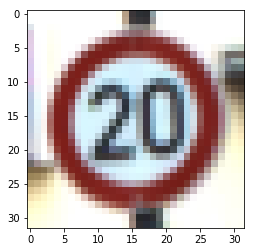

Class: 1


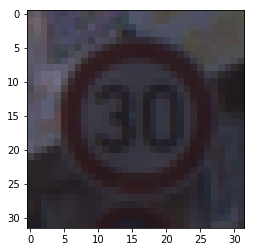

Class: 2


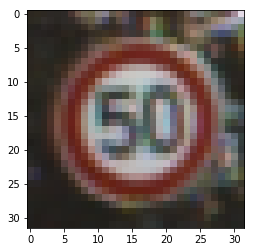

Class: 3


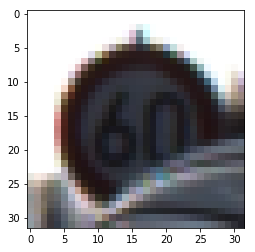

Class: 4


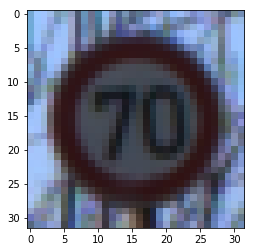

Class: 5


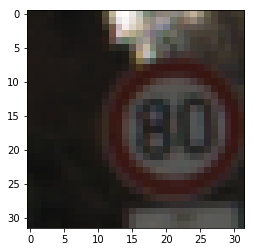

Class: 6


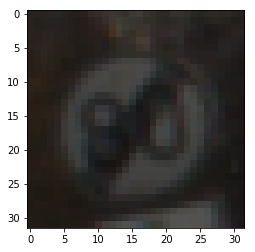

Class: 7


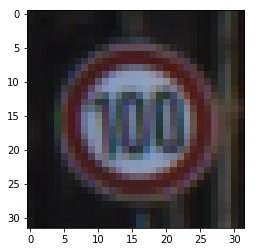

Class: 8


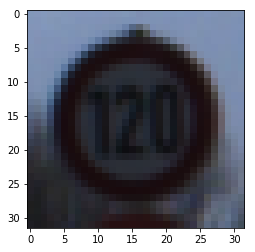

Class: 9


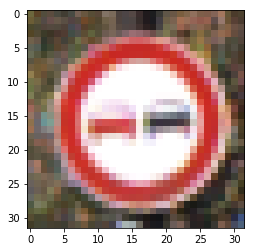

Class: 10


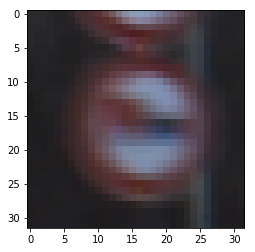

Class: 11


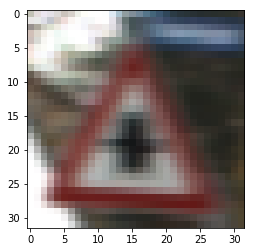

Class: 12


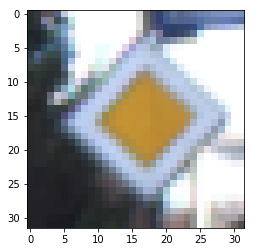

Class: 13


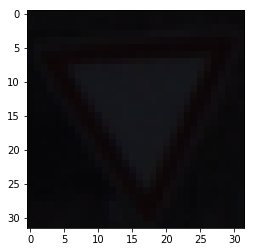

Class: 14


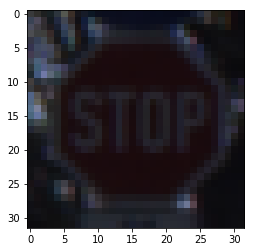

Class: 15


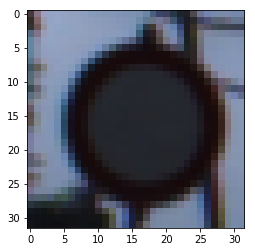

Class: 16


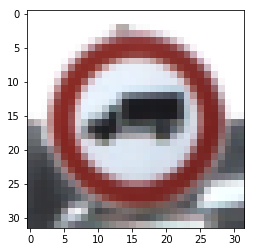

Class: 17


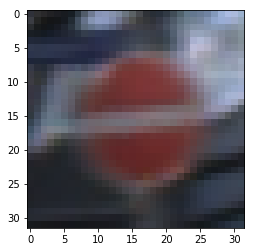

Class: 18


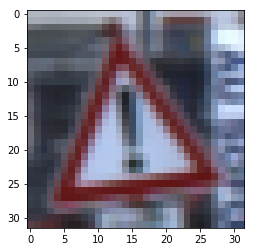

Class: 19


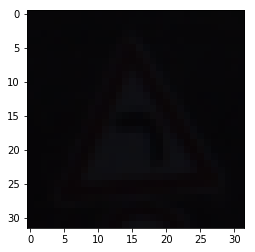

Class: 20


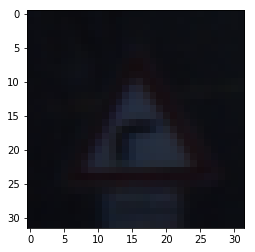

Class: 21


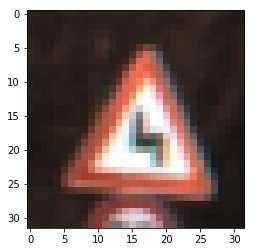

Class: 22


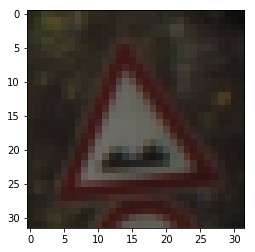

Class: 23


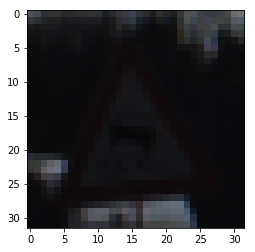

Class: 24


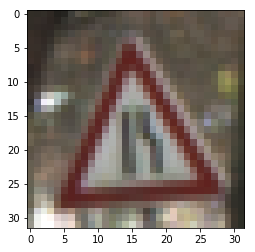

Class: 25


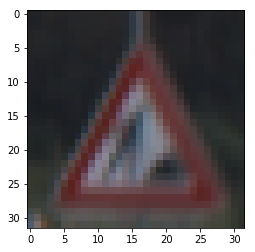

Class: 26


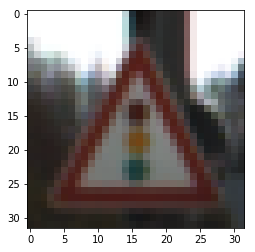

Class: 27


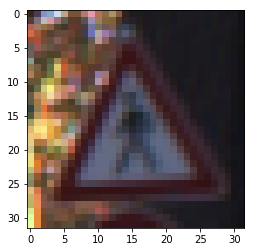

Class: 28


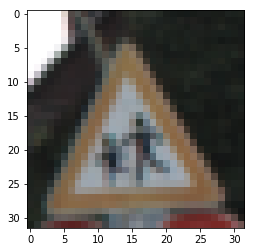

Class: 29


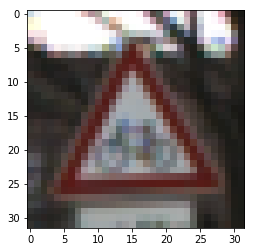

Class: 30


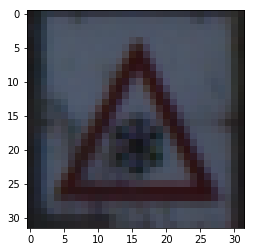

Class: 31


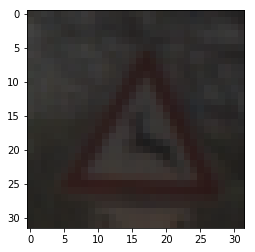

Class: 32


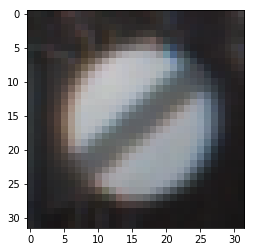

Class: 33


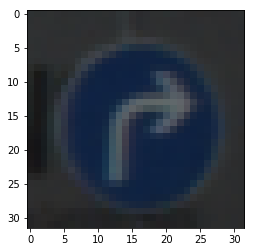

Class: 34


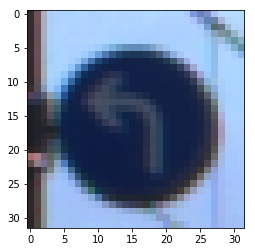

Class: 35


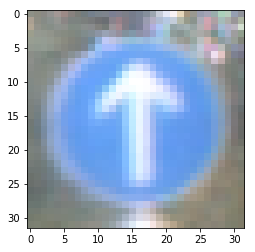

Class: 36


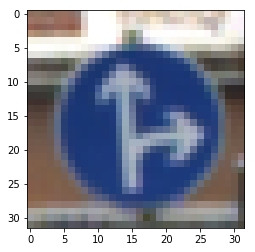

Class: 37


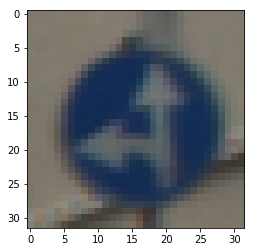

Class: 38


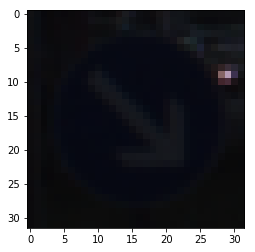

Class: 39


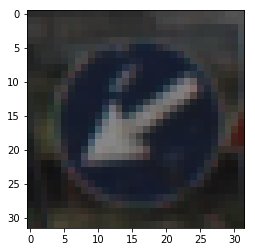

Class: 40


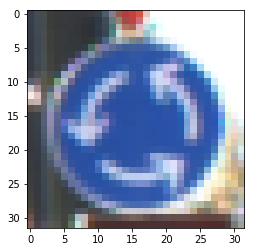

Class: 41


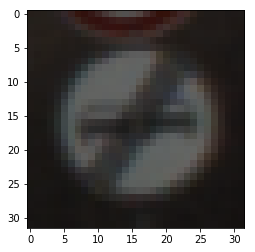

Class: 42


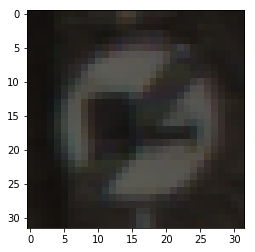

In [6]:
import numpy as np
import matplotlib.pyplot as plt
n_classes = len(np.unique(y_train))

# Print out Signs corresponding to the class number.
for i in range(n_classes):
    print("Class:",i)
    plt.imshow(X_train[np.argwhere(y_train==i)[20][0]])
    plt.show()

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.Include an exploratory visualization of the dataset

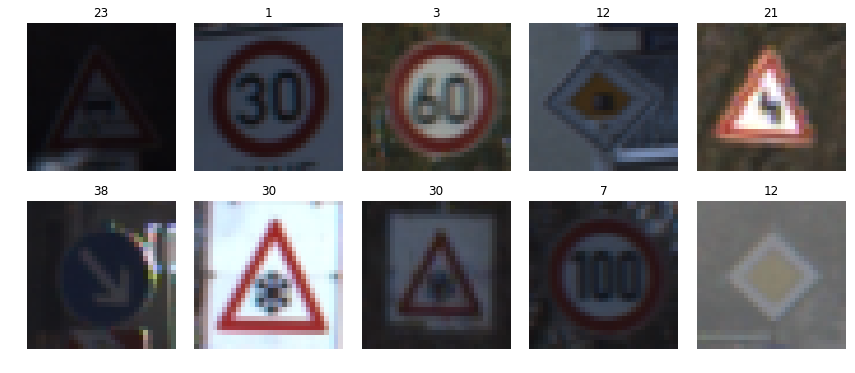

In [45]:
### Data exploration visualization goes here.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

# show image of 10 random data points
fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(10):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])

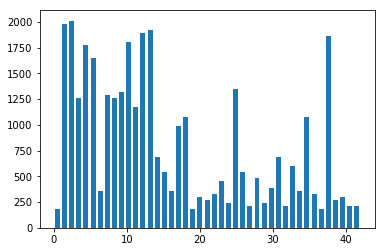

In [36]:
# histogram of label frequency
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

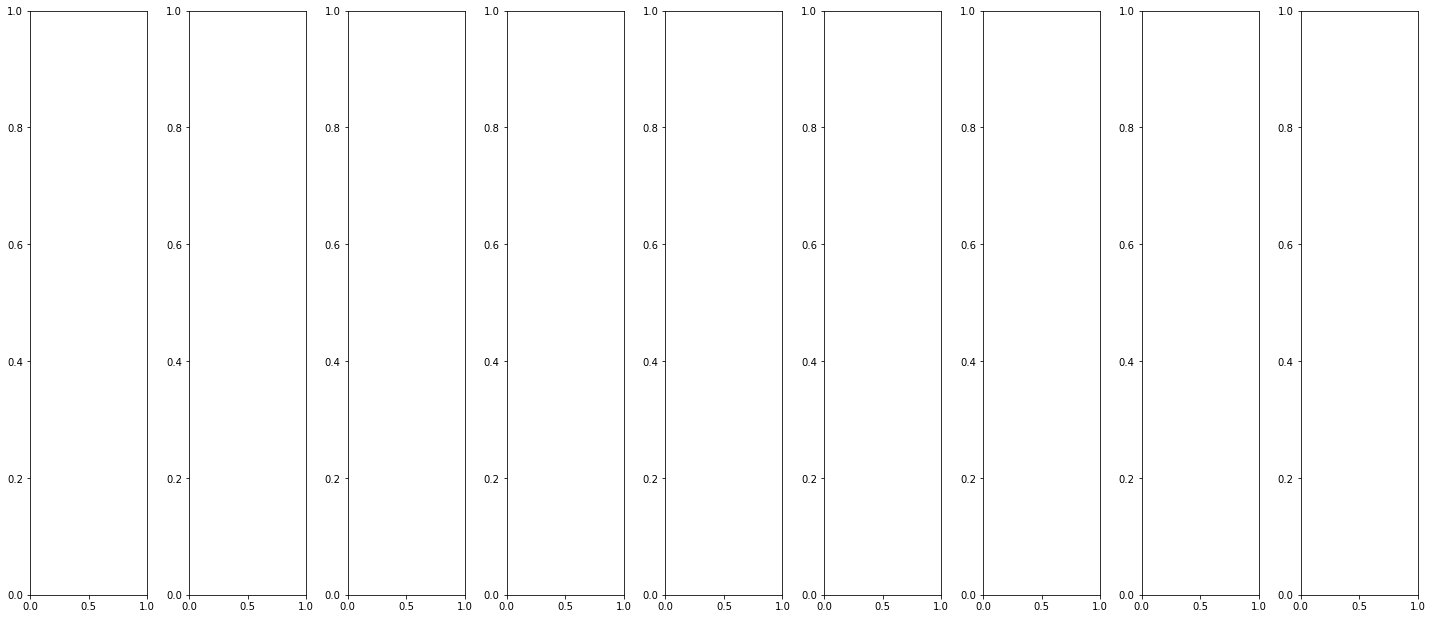

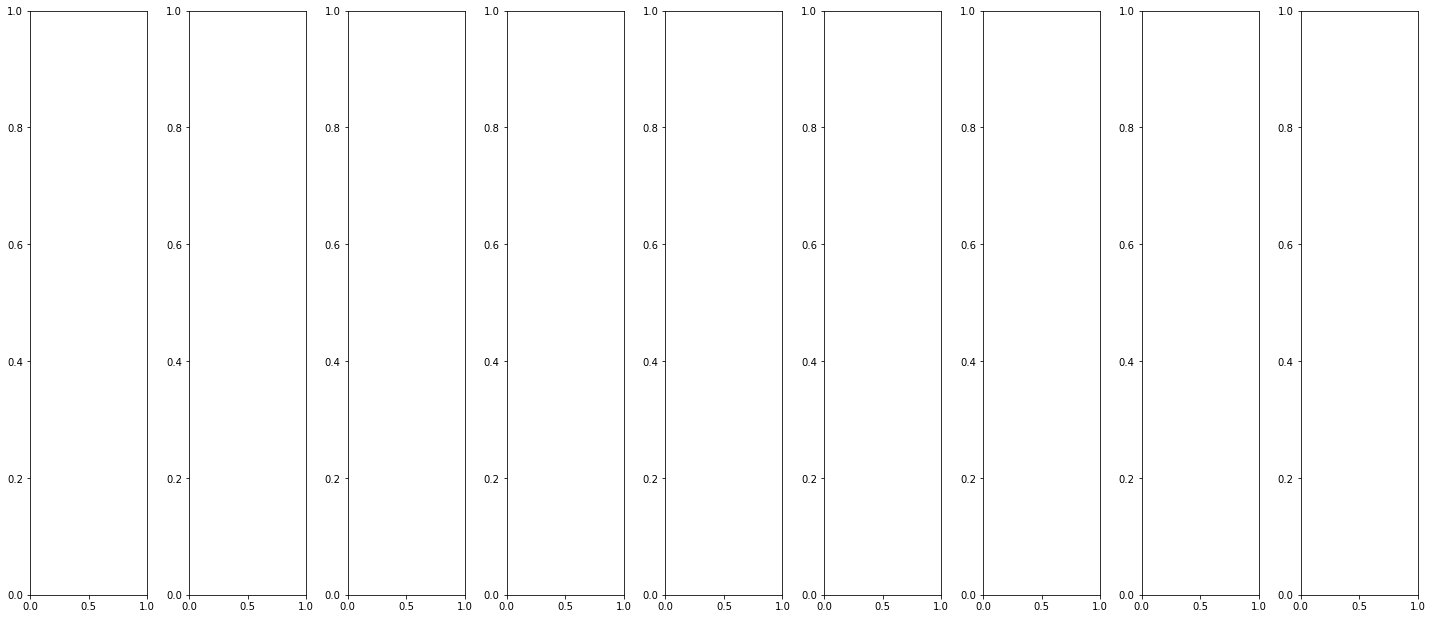

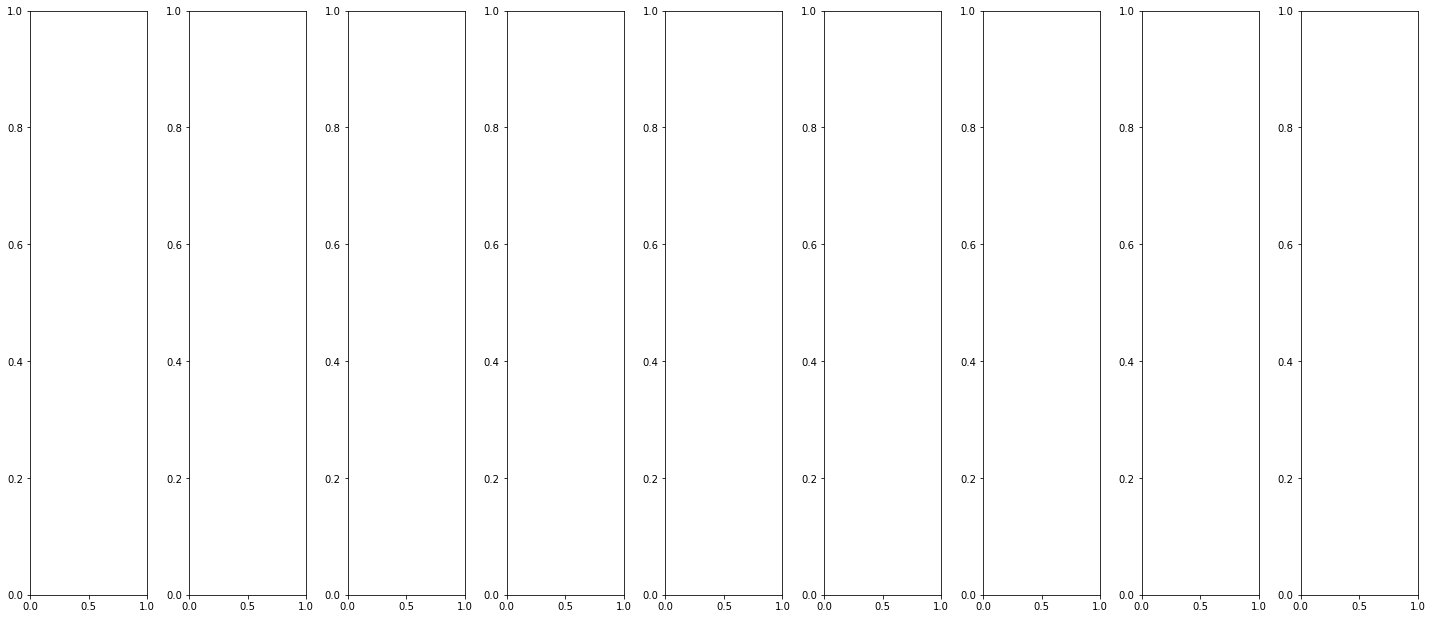

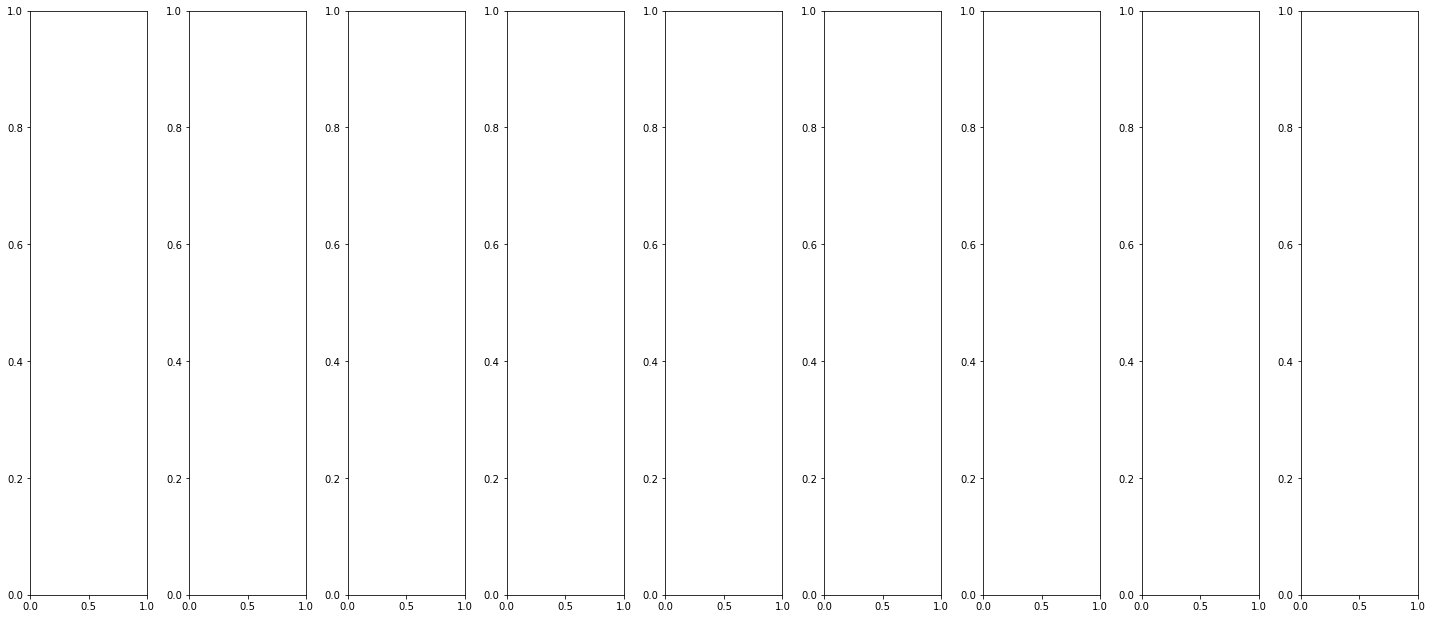

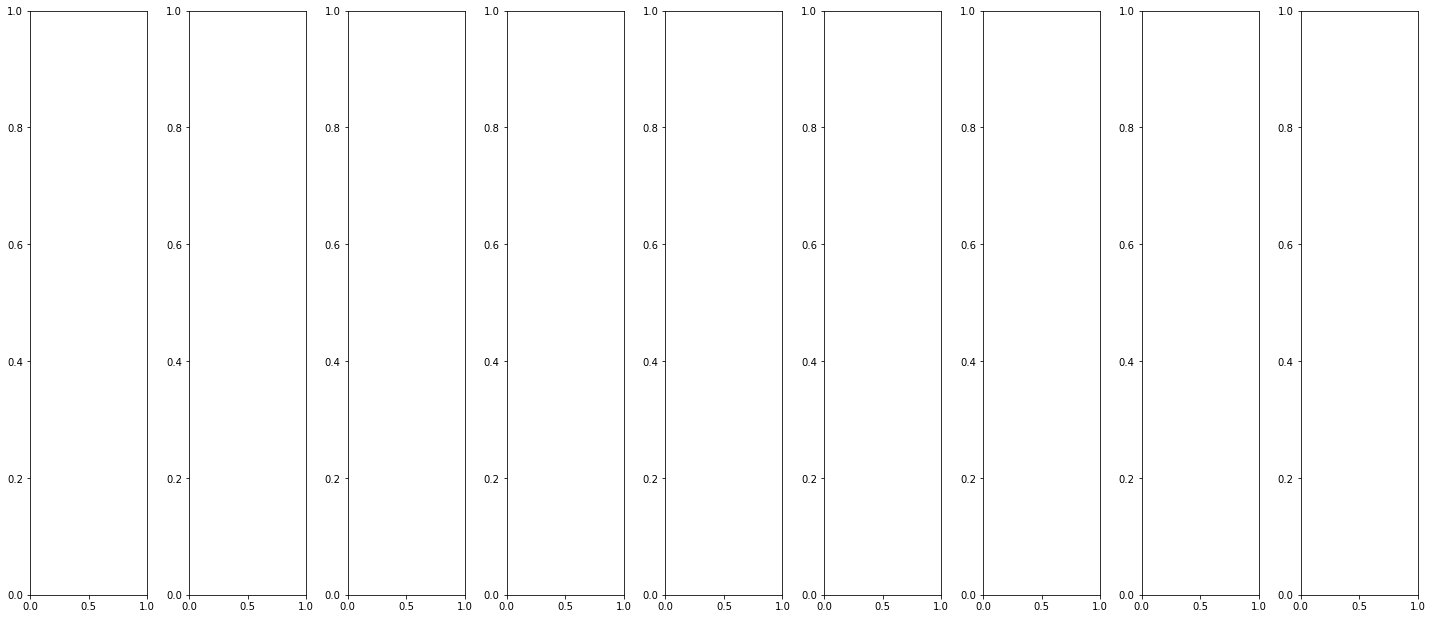

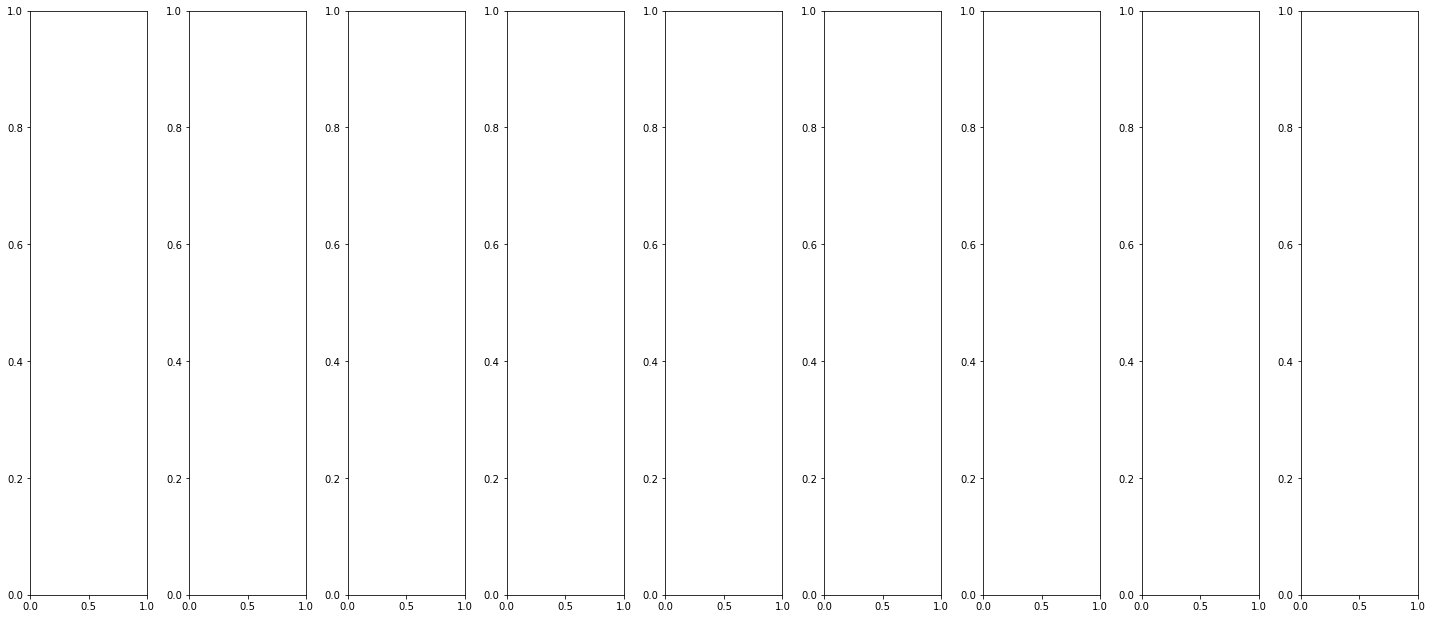

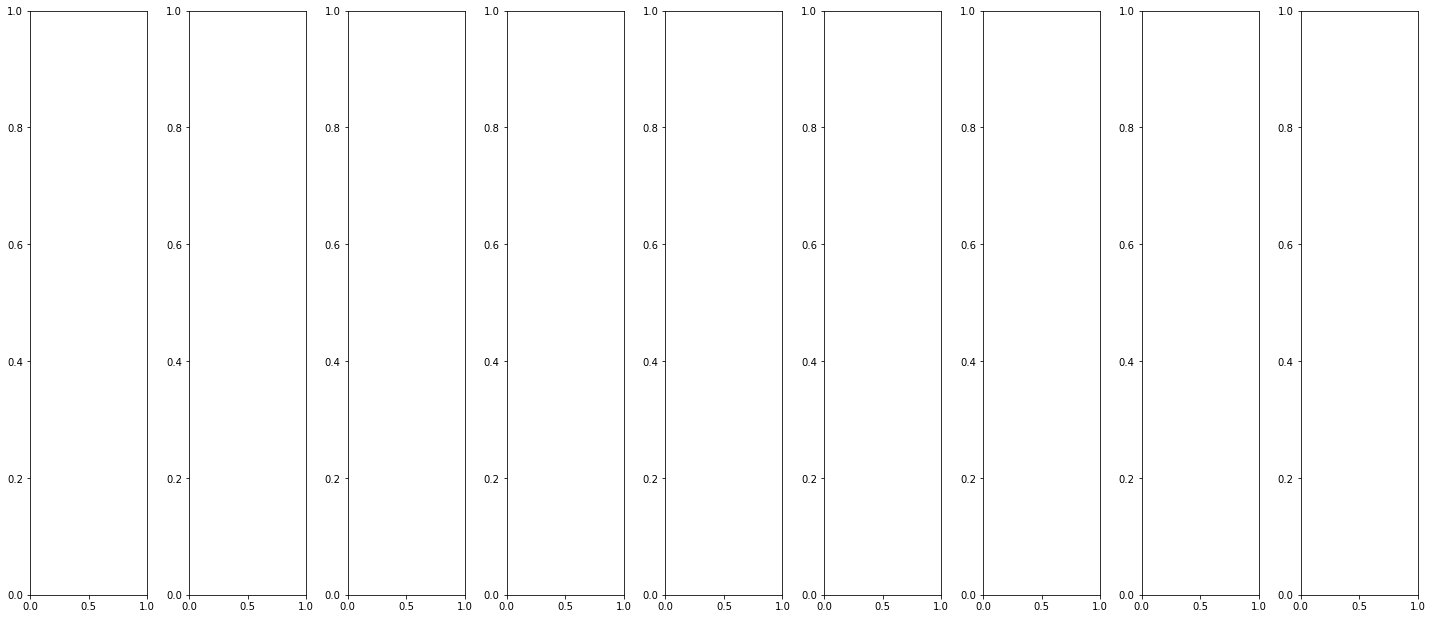

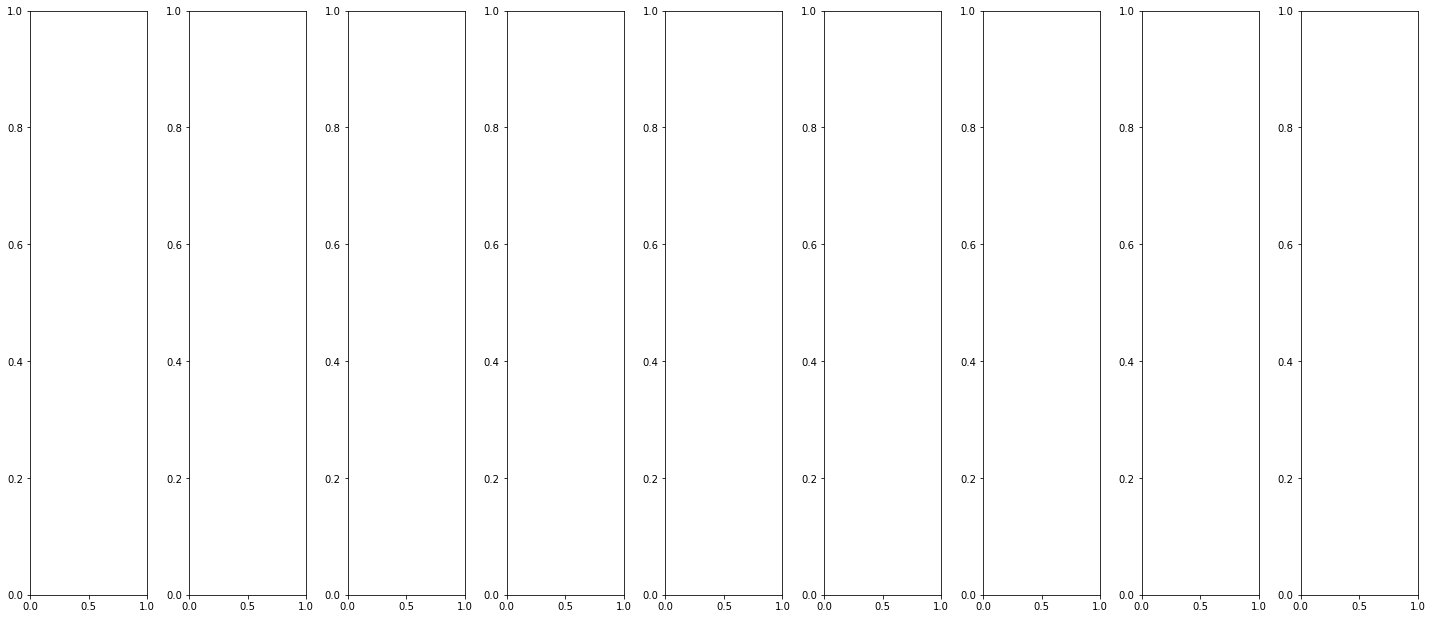

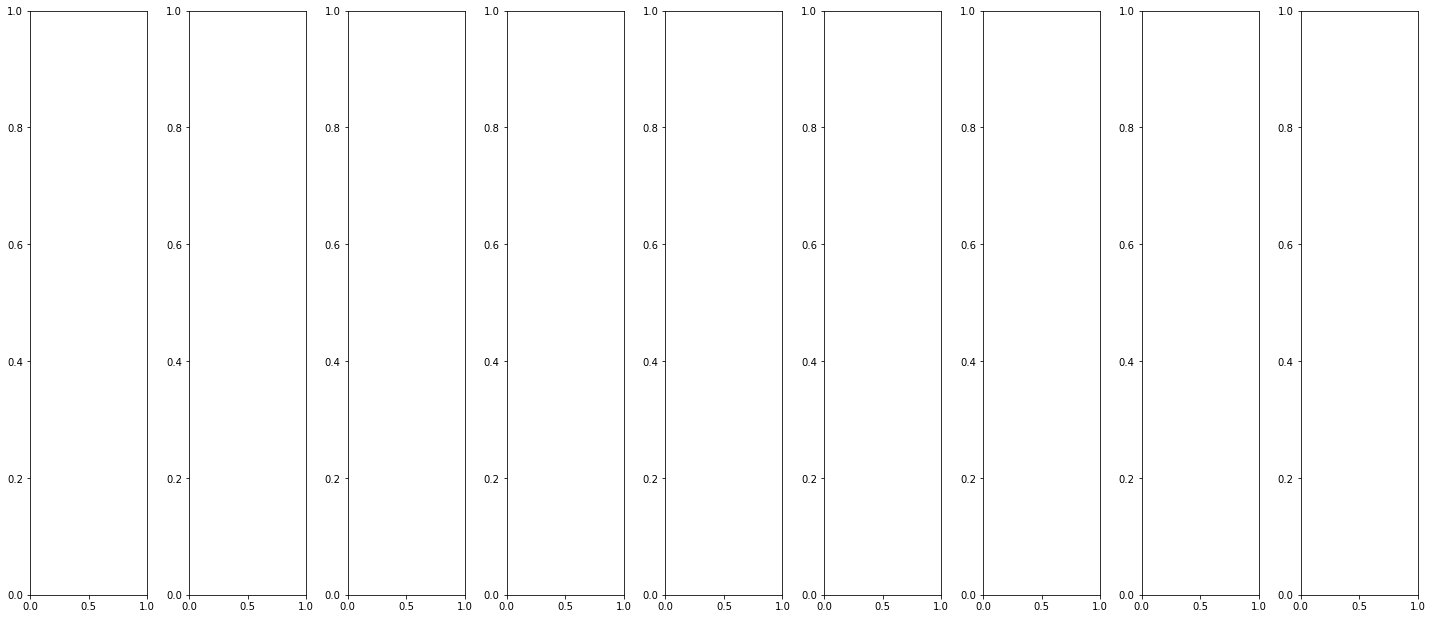

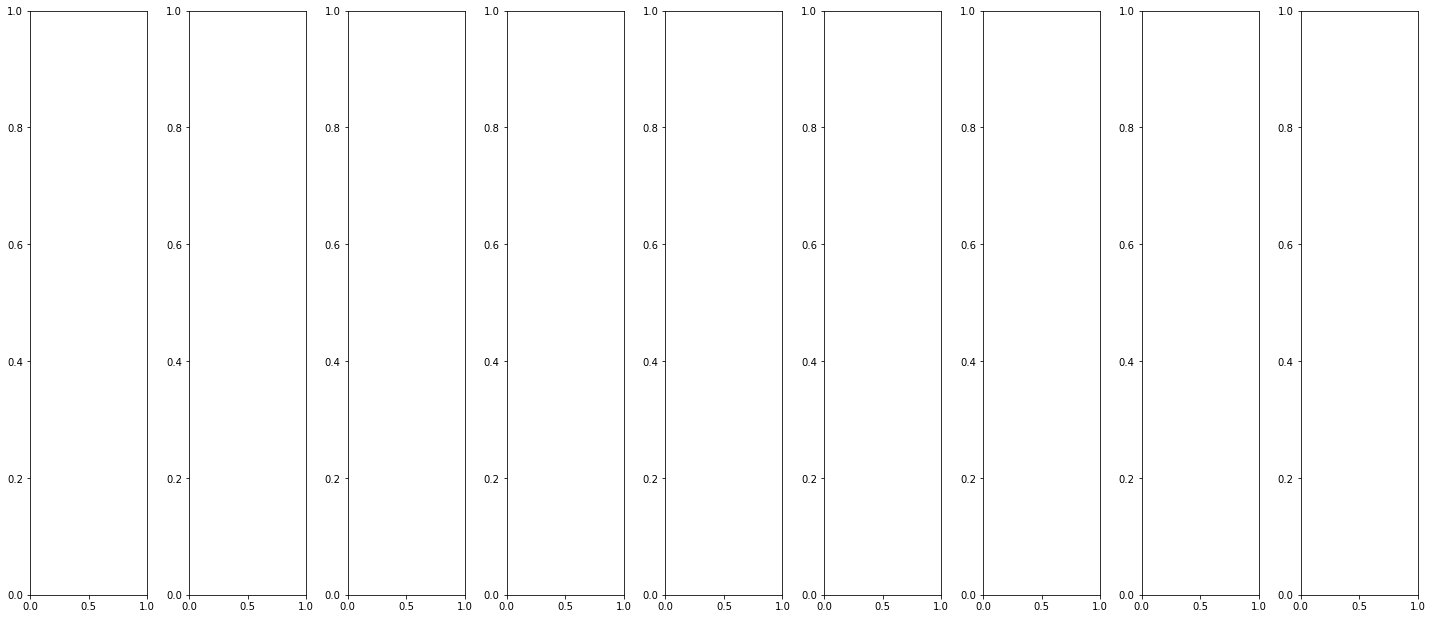

In [108]:
import random

mini_batch_size = 9
for start in range(0, 90, mini_batch_size): 
    fig, axes = plt.subplots(1,mini_batch_size)
    end = start+mini_batch_size
    for i, ((image, ax), label) in enumerate(zip(zip(X_train[start:end], axes), y_train[start:end])):
        ax.set_title(label)
        ax.imshow(image.squeeze())

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

In [58]:
def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1

    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)

    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 10), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(10))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits

In [14]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

# Convert to grayscale
X_train_rgb = X_train
X_train_gry = np.sum(X_train/3, axis=3, keepdims=True)

X_test_rgb = X_test
X_test_gry = np.sum(X_test/3, axis=3, keepdims=True)

print('RGB shape:', X_train_rgb.shape)
print('Grayscale shape:', X_train_gry.shape)


RGB shape: (34799, 32, 32, 3)
Grayscale shape: (34799, 32, 32, 1)


In [15]:
X_train = X_train_gry
X_test = X_test_gry

print('done')

done


In [ ]:
#remove this and delete this
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

X_train = []
y_train = []

for i, (image, label) in enumerate(zip(X_train_non_normalized, y_train_non_normalized)):
    zeros = np.zeros((32,32,3))
    norm_image = cv2.normalize(image, zeros, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    X_train.append(norm_image)
    y_train.append(label)
    '''
    rows, cols, depth = norm_image.shape
    center = (cols/2, rows/2)
    M_180 = cv2.getRotationMatrix2D(center, 180, 1)
    rotated_180 = cv2.warpAffine(norm_image, M_180, (cols,rows))
    X_train.append(rotated_180)
    y_train.append(label)
    '''

import random
mini_batch_size = 9
for start in range(0, 90, mini_batch_size): 
    fig, axes = plt.subplots(1,mini_batch_size)
    end = start+mini_batch_size
    for i, ((image, ax), label) in enumerate(zip(zip(X_train[start:end], axes), y_train[start:end])):
        ax.set_title(label)
        ax.imshow(image.squeeze())

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

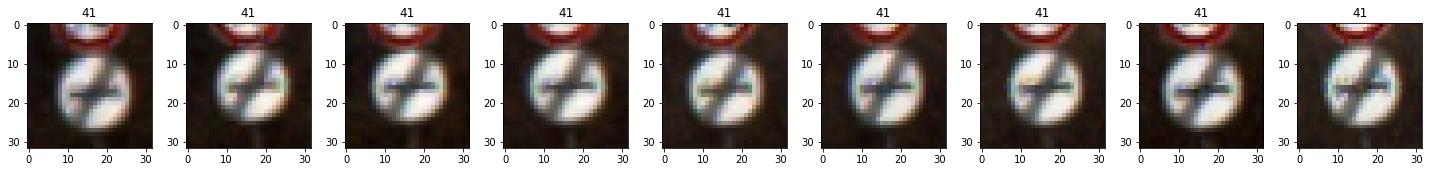

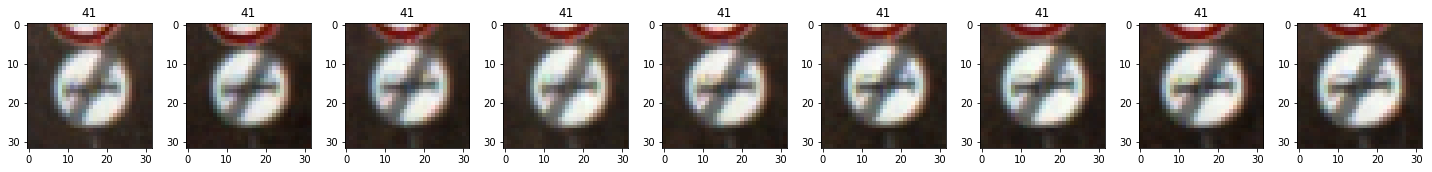

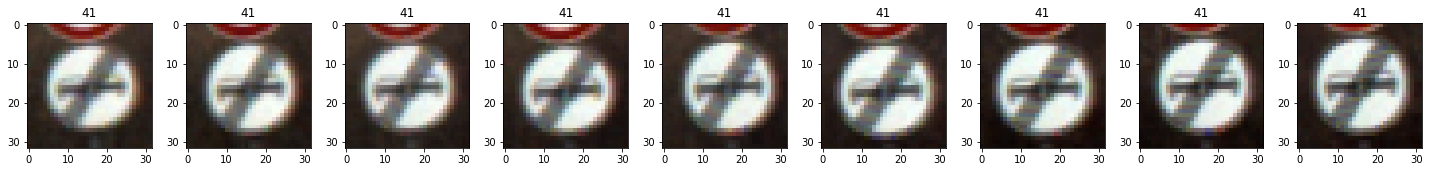

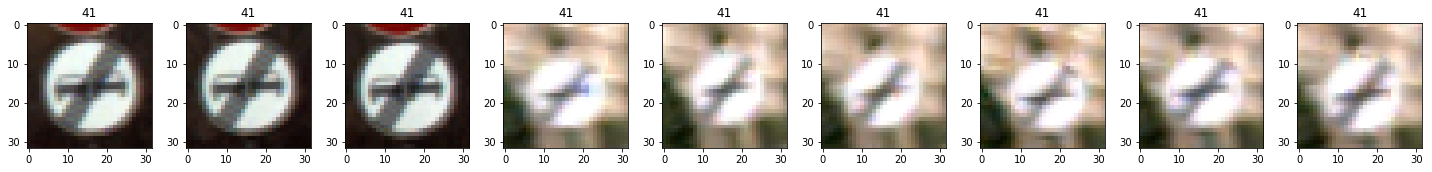

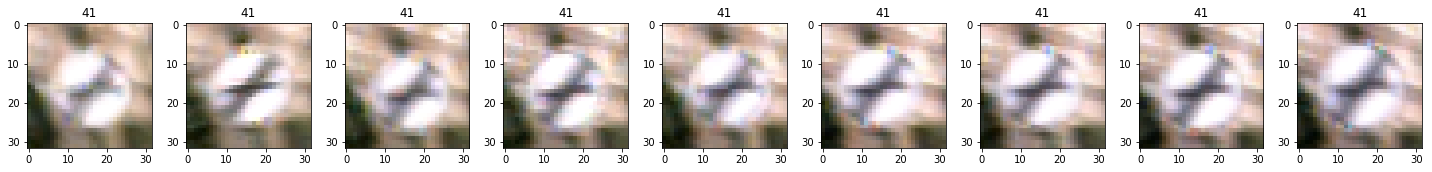

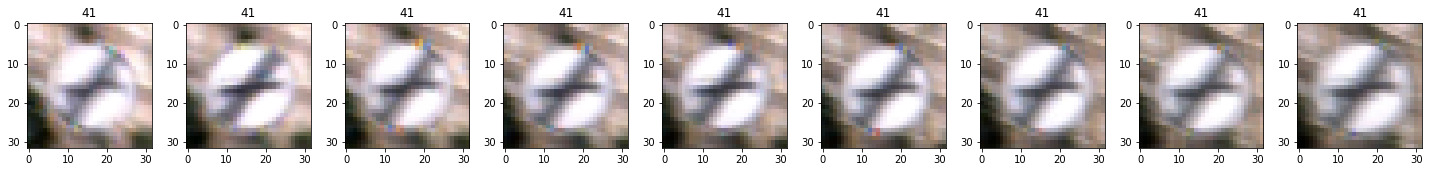

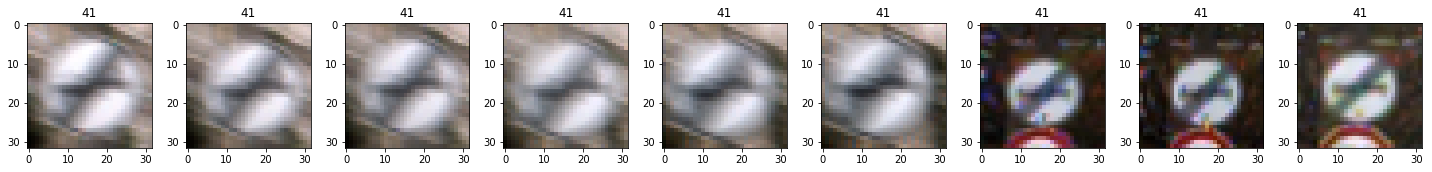

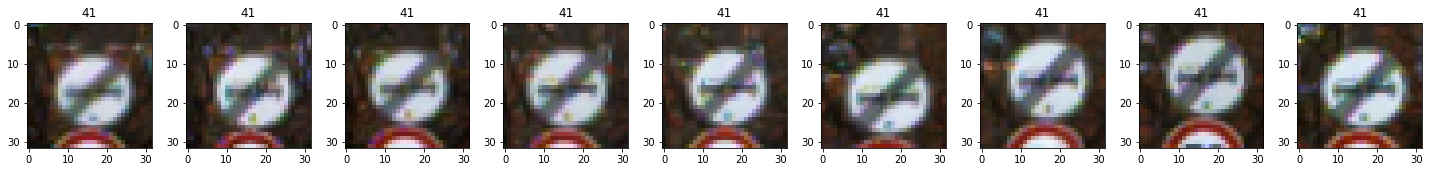

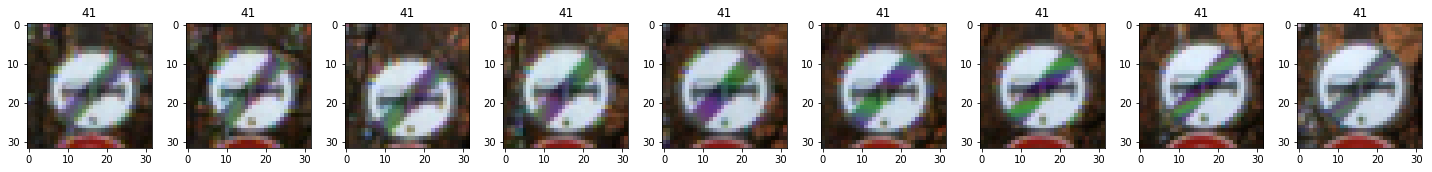

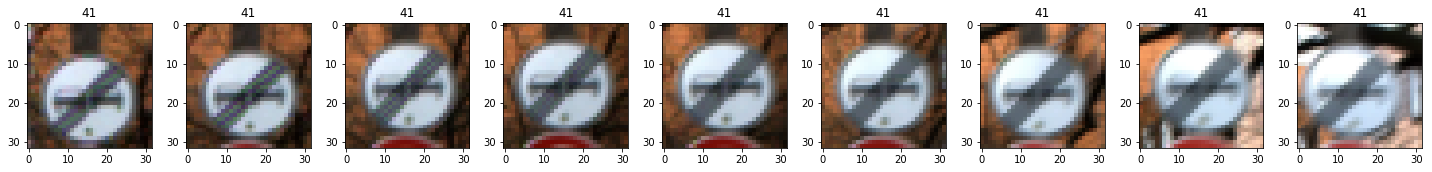

In [16]:
# Visualize rgb vs grayscale
n_rows = 8
n_cols = 10
offset = 9000
fig, axs = plt.subplots(n_rows,n_cols, figsize=(18, 14))
fig.subplots_adjust(hspace = .1, wspace=.001)
axs = axs.ravel()
for j in range(0,n_rows,2):
    for i in range(n_cols):
        index = i + j*n_cols
        image = X_train_rgb[index + offset]
        axs[index].axis('off')
        axs[index].imshow(image)
    for i in range(n_cols):
        index = i + j*n_cols + n_cols 
        image = X_train_gry[index + offset - n_cols].squeeze()
        axs[index].axis('off')
        axs[index].imshow(image, cmap='gray')

In [17]:
print(y_train[0:500])

[41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31,

In [18]:
print(np.mean(X_train))
print(np.mean(X_test))

0.340686
82.1484603612


In [13]:
## Normalize the train and test datasets to (-1,1)

X_train_normalized = (X_train - 128)/128 
X_test_normalized = (X_test - 128)/128

print(np.mean(X_train_normalized))
print(np.mean(X_test_normalized))

1.21925099939
1.21879869422


Original shape: (34799, 32, 32, 3)
Normalized shape: (34799, 32, 32, 3)


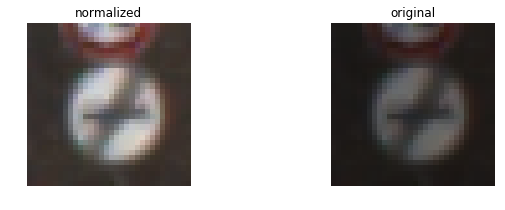

In [80]:
X_train_normalized = (X_train - 128)/128 
X_test_normalized = (X_test - 128)/128



print("Original shape:", X_train.shape)
print("Normalized shape:", X_train_normalized.shape)
fig, axs = plt.subplots(1,2, figsize=(10, 3))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('normalized')
axs[0].imshow(X_train_normalized[0].squeeze(), cmap='gray')

axs[1].axis('off')
axs[1].set_title('original')
axs[1].imshow(X_train[0].squeeze(), cmap='gray')

My dataset preprocessing consisted of:

1) Converting to grayscale. 2)Normalizing the data to the range (-1,1) - This was done using the line of code X_train_normalized = (X_train - 128)/128. The resulting dataset mean wasn't zero, but it was reduced from around 82 to roughly -0.35. 

shape in/out: (32, 32, 3) (32, 32, 1, 3)


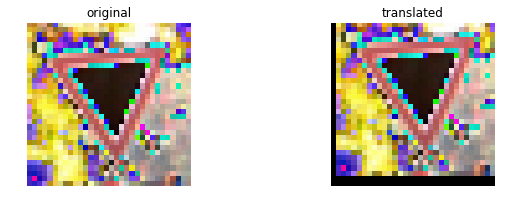

In [81]:
import cv2

def random_translate(img):
    rows,cols,_ = img.shape
    
    # allow translation up to px pixels in x and y directions
    px = 2
    dx,dy = np.random.randint(-px,px,2)

    M = np.float32([[1,0,dx],[0,1,dy]])
    dst = cv2.warpAffine(img,M,(cols,rows))
    
    dst = dst[:,:,np.newaxis]
    
    return dst

test_img = X_train_normalized[22222]

test_dst = random_translate(test_img)

fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('translated')

print('shape in/out:', test_img.shape, test_dst.shape)

shape in/out: (32, 32, 3) (32, 32, 1, 3)


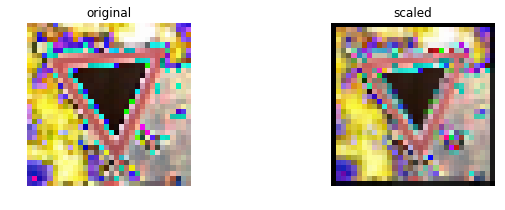

In [82]:
def random_scaling(img):   
    rows,cols,_ = img.shape

    # transform limits
    px = np.random.randint(-2,2)

    # ending locations
    pts1 = np.float32([[px,px],[rows-px,px],[px,cols-px],[rows-px,cols-px]])

    # starting locations (4 corners)
    pts2 = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])

    M = cv2.getPerspectiveTransform(pts1,pts2)

    dst = cv2.warpPerspective(img,M,(rows,cols))
    
    dst = dst[:,:,np.newaxis]
    
    return dst

test_dst = random_scaling(test_img)
    
fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('scaled')

print('shape in/out:', test_img.shape, test_dst.shape)


shape in/out: (32, 32, 3) (32, 32, 1, 3)


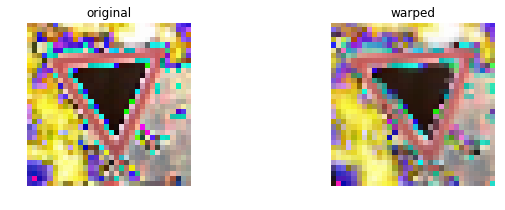

In [83]:
def random_warp(img):
    
    rows,cols,_ = img.shape

    # random scaling coefficients
    rndx = np.random.rand(3) - 0.5
    rndx *= cols * 0.06   # this coefficient determines the degree of warping
    rndy = np.random.rand(3) - 0.5
    rndy *= rows * 0.06

    # 3 starting points for transform, 1/4 way from edges
    x1 = cols/4
    x2 = 3*cols/4
    y1 = rows/4
    y2 = 3*rows/4

    pts1 = np.float32([[y1,x1],
                       [y2,x1],
                       [y1,x2]])
    pts2 = np.float32([[y1+rndy[0],x1+rndx[0]],
                       [y2+rndy[1],x1+rndx[1]],
                       [y1+rndy[2],x2+rndx[2]]])

    M = cv2.getAffineTransform(pts1,pts2)

    dst = cv2.warpAffine(img,M,(cols,rows))
    
    dst = dst[:,:,np.newaxis]
    
    return dst

test_dst = random_warp(test_img)

fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('warped')

print('shape in/out:', test_img.shape, test_dst.shape)


shape in/out: (32, 32, 3) (32, 32, 3)


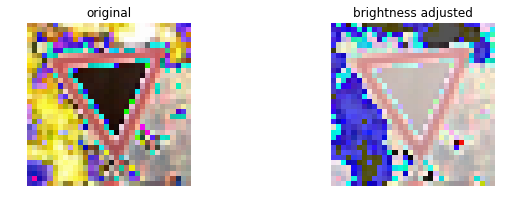

In [84]:
def random_brightness(img):
    shifted = img + 1.0   # shift to (0,2) range
    img_max_value = max(shifted.flatten())
    max_coef = 2.0/img_max_value
    min_coef = max_coef - 0.1
    coef = np.random.uniform(min_coef, max_coef)
    dst = shifted * coef - 1.0
    return dst

test_dst = random_brightness(test_img)

fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('brightness adjusted')

print('shape in/out:', test_img.shape, test_dst.shape)


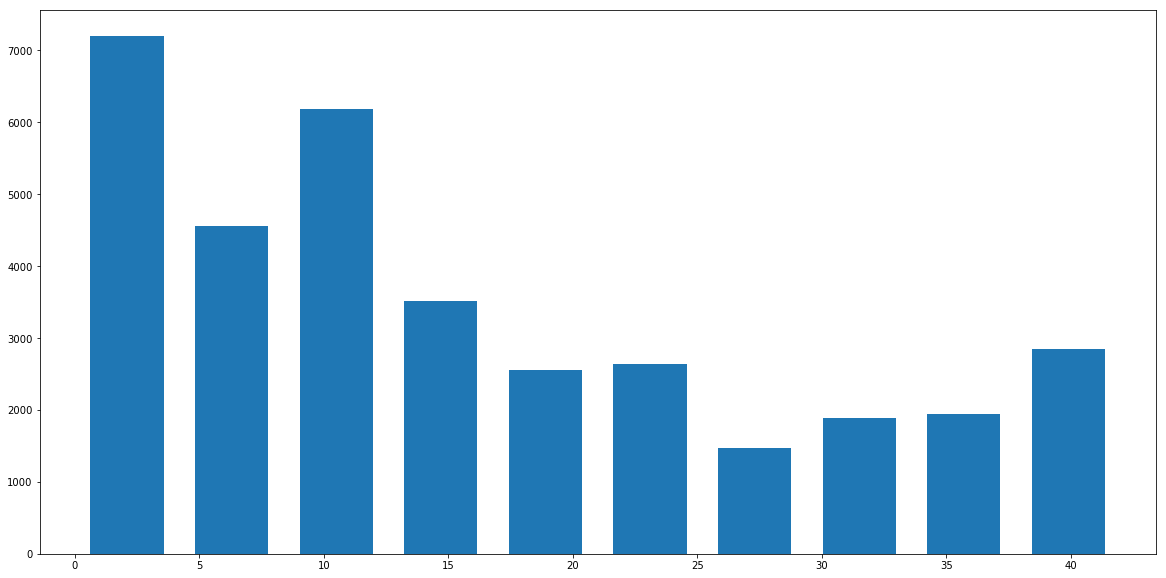

In [85]:
# histogram of label frequency (once again, before data augmentation)
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

In [86]:
print(np.bincount(y_train))
print("minimum samples for any label:", min(np.bincount(y_train)))

[ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]
minimum samples for any label: 180


In [91]:
## Shuffle the training dataset

from sklearn.utils import shuffle

X_train_normalized, y_train = shuffle(X_train_normalized, y_train)

print('done')

done


In [92]:
## Split validation dataset off from training dataset

from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train_normalized, y_train, 
                                                                test_size=0.20, random_state=42)

print("Old X_train size:",len(X_train_normalized))
print("New X_train size:",len(X_train))
print("X_validation size:",len(X_validation))

Old X_train size: 34799
New X_train size: 27839
X_validation size: 6960


# Step 2: Design and Test a Model Architecture
Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the German Traffic Sign Dataset.

There are various aspects to consider when thinking about this problem:
Neural network architecture
Play around preprocessing techniques (normalization, rgb to grayscale, etc)

Number of examples per label (some have more than others).
Generate fake data.

In [94]:
import tensorflow as tf

EPOCHS = 60
BATCH_SIZE = 100

print('done')

done


In [93]:
def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1

    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)

    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 10), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(10))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits

In [95]:
from tensorflow.contrib.layers import flatten

def LeNet2(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    W1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma), name="W1")
    x = tf.nn.conv2d(x, W1, strides=[1, 1, 1, 1], padding='VALID')
    b1 = tf.Variable(tf.zeros(6), name="b1")
    x = tf.nn.bias_add(x, b1)
    print("layer 1 shape:",x.get_shape())

    # TODO: Activation.
    x = tf.nn.relu(x)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer1 = x
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    W2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma), name="W2")
    x = tf.nn.conv2d(x, W2, strides=[1, 1, 1, 1], padding='VALID')
    b2 = tf.Variable(tf.zeros(16), name="b2")
    x = tf.nn.bias_add(x, b2)
                     
    # TODO: Activation.
    x = tf.nn.relu(x)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer2 = x
    
    # TODO: Layer 3: Convolutional. Output = 1x1x400.
    W3 = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma), name="W3")
    x = tf.nn.conv2d(x, W3, strides=[1, 1, 1, 1], padding='VALID')
    b3 = tf.Variable(tf.zeros(400), name="b3")
    x = tf.nn.bias_add(x, b3)
                     
    # TODO: Activation.
    x = tf.nn.relu(x)
    layer3 = x

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    layer2flat = flatten(layer2)
    print("layer2flat shape:",layer2flat.get_shape())
    
    # Flatten x. Input = 1x1x400. Output = 400.
    xflat = flatten(x)
    print("xflat shape:",xflat.get_shape())
    
    # Concat layer2flat and x. Input = 400 + 400. Output = 800
    x = tf.concat_v2([xflat, layer2flat], 1)
    print("x shape:",x.get_shape())
    
    # Dropout
    x = tf.nn.dropout(x, keep_prob)
    
    # TODO: Layer 4: Fully Connected. Input = 800. Output = 43.
    W4 = tf.Variable(tf.truncated_normal(shape=(800, 43), mean = mu, stddev = sigma), name="W4")
    b4 = tf.Variable(tf.zeros(43), name="b4")    
    logits = tf.add(tf.matmul(x, W4), b4)
    
    # TODO: Activation.
    #x = tf.nn.relu(x)

    # TODO: Layer 5: Fully Connected. Input = 120. Output = 84.
    #W5 = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    #b5 = tf.Variable(tf.zeros(84)) 
    #x = tf.add(tf.matmul(x, W5), b5)
    
    # TODO: Activation.
    #x = tf.nn.relu(x)

    # TODO: Layer 6: Fully Connected. Input = 84. Output = 43.
    #W6 = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    #b6 = tf.Variable(tf.zeros(43)) 
    #logits = tf.add(tf.matmul(x, W6), b6)
    
    return logits

print('done')

done


In [96]:
tf.reset_default_graph() 

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) # probability to keep units
one_hot_y = tf.one_hot(y, 43)

print('done')

done


In [103]:
rate = 0.0009

logits = LeNet2(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


layer 1 shape: (?, 28, 28, 6)
layer2flat shape: (?, 400)
xflat shape: (?, 400)


AttributeError: module 'tensorflow' has no attribute 'concat_v2'

In [11]:
## Normalize the train and test datasets to (-1,1)

X_train_normalized = (X_train - 128)/128 
X_test_normalized = (X_test - 128)/128

print(np.mean(X_train_normalized))
print(np.mean(X_test_normalized))


import cv2

def random_translate(img):
    rows,cols,_ = img.shape
    
    # allow translation up to px pixels in x and y directions
    px = 2
    dx,dy = np.random.randint(-px,px,2)

    M = np.float32([[1,0,dx],[0,1,dy]])
    dst = cv2.warpAffine(img,M,(cols,rows))
    
    dst = dst[:,:,np.newaxis]
    
    return dst

test_img = X_train_normalized[22222]

test_dst = random_translate(test_img)

fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('translated')

print('shape in/out:', test_img.shape, test_dst.shape)

1.21925099939
1.21879869422
shape in/out: (32, 32, 3) (32, 32, 1, 3)


In [10]:
import matplotlib.pyplot as plt

def random_scaling(img):   
    rows,cols,_ = img.shape

    # transform limits
    px = np.random.randint(-2,2)

    # ending locations
    pts1 = np.float32([[px,px],[rows-px,px],[px,cols-px],[rows-px,cols-px]])

    # starting locations (4 corners)
    pts2 = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])

    M = cv2.getPerspectiveTransform(pts1,pts2)

    dst = cv2.warpPerspective(img,M,(rows,cols))
    
    dst = dst[:,:,np.newaxis]
    
    return dst

test_img = X_train_normalized[22222]

test_dst = random_scaling(test_img)
    
fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('scaled')

print('shape in/out:', test_img.shape, test_dst.shape)


shape in/out: (32, 32, 3) (32, 32, 1, 3)


In [105]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

X_train = []
y_train = []
all_images = dict()
images = dict()
for i, (image, label) in enumerate(zip(X_train_non_normalized, y_train_non_normalized)):
    if label not in all_images:
        all_images[label] = []
    zeros = np.zeros((32,32,3))
    norm_image = cv2.normalize(image, zeros, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    X_train.append(norm_image)
    y_train.append(label)
    images[label] = norm_image
    all_images[label].append(norm_image)
training_file = 'traffic-signs-data/train.p'
validation_file='traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_non_normalized, y_train_non_normalized = train['features'], train['labels']

X_train = []
y_train = []
all_images = dict()
images = dict()
for i, (image, label) in enumerate(zip(X_train_non_normalized, y_train_non_normalized)):
    if label not in all_images:
        all_images[label] = []
    zeros = np.zeros((32,32,3))
    norm_image = cv2.normalize(image, zeros, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    X_train.append(norm_image)
    y_train.append(label)
    images[label] = norm_image
    all_images[label].append(norm_image)
images = dict()


mini_batch_size = 9
images_labels = list(images.keys())
print(len(images_labels))
for start in range(0, len(images_labels), mini_batch_size): 
    end = start+mini_batch_size 
    end = end if end < len(images_labels) else len(images_labels)
    mini_batch_size = end - start
    fig, axes = plt.subplots(1,mini_batch_size)
    for i, (label, ax) in enumerate(zip(images_labels[start:end], axes)):
        ax.set_title(label)
        ax.imshow(images[label].squeeze())

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()


images_labels = list(all_images.keys())
for image_key in images_labels:        
    subplots = 12
    fig, axes = plt.subplots(1,subplots)
    images_total = len(all_images[image_key])
    print(images_total)
    offset = images_total // subplots
    images = [all_images[image_key][j*offset] for j in range(subplots)]
    for i, (image, ax) in enumerate(zip(images, axes)):
        ax.set_title(image_key)
        ax.imshow(image.squeeze())
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

all_images.clear()

NameError: name 'X_train_non_normalized' is not defined

In [50]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [35]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation and dropout.
    fc1    = tf.nn.relu(fc1)
    fc1  = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation and dropout
    fc2    = tf.nn.relu(fc2)
    fc2    = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [113]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten


def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    create_weight = lambda shape, name: tf.Variable(tf.truncated_normal(shape=shape, mean=mu, stddev=sigma, name=name))
    create_bias = lambda size, name: tf.Variable(tf.constant(0.1,shape=[size]), name=name)
    conv2d_stride_1x1 = lambda input_x, w: tf.nn.conv2d(input_x, w, strides=[1,1,1,1], padding='SAME')
    
    # Inception 1
    # Sublayer 1 - 32x32x3 -> 1x1 (32,32,32)
    in1_sl1_w = create_weight((1,1,3,16), name='in1_sl1_w')
    in1_sl1_b = create_bias(16, name='in1_sl1_b')
    in1_sl1 = conv2d_stride_1x1(x, in1_sl1_w) + in1_sl1_b
    
    # Sublayer 2 - 32x32x3 -> 1x1 -> 3x3 (30,30,32)
    in1_sl2_1_w = create_weight((1,1,3,8), name='in1_sl2_1_w')
    in1_sl2_1_b = create_bias(8, name='in1_sl2_1_b')
    in1_sl2 = tf.nn.relu(conv2d_stride_1x1(x, in1_sl2_1_w) + in1_sl2_1_b)
    
    in1_sl2_2_w = create_weight((3,3,8,16), name='in1_sl2_2_w')
    in1_sl2_2_b = create_bias(16, name='in1_sl2_2_b')
    in1_sl2 = conv2d_stride_1x1(in1_sl2, in1_sl2_2_w) + in1_sl2_2_b
    
    # Sublayer 3 - 32x32x3 -> 1x1 -> 5x5 (28,28,32)
    in1_sl3_1_w = create_weight((1,1,3,8), name='in1_sl3_1_w')
    in1_sl3_1_b = create_bias(8, name='in1_sl3_1_b')
    in1_sl3 = tf.nn.relu(conv2d_stride_1x1(x, in1_sl3_1_w) + in1_sl3_1_b)
    
    in1_sl3_2_w = create_weight((5,5,8,16), name='in1_sl3_2_w')
    in1_sl3_2_b = create_bias(16, name='in1_sl3_2_b')
    in1_sl3 = conv2d_stride_1x1(in1_sl3, in1_sl3_2_w) + in1_sl3_2_b

    # SubLayer 4 - 32x32x3 -> 3x3 maxpool -> 1x1 (30,30,32)
    in1_sl4 = tf.nn.max_pool(x, ksize=[1, 3, 3, 1], strides=[1, 1, 1, 1], padding='SAME')
    in1_sl4_1_w = create_weight((1,1,3,16), name='in1_sl4_1_w')
    in1_sl4_1_b = create_bias(16, name='in1_sl4_1_b')
    in1_sl4 = conv2d_stride_1x1(in1_sl4, in1_sl4_1_w) + in1_sl4_1_b

    # Concatenate sublayers, add depths
    inception1 = tf.nn.relu(tf.concat(3, [in1_sl1,in1_sl2,in1_sl3,in1_sl4]))
    
    # Inception 2 Same as first inception
    # Sublayer 1 - 32,32,128 -> 1x1 (32,32,32)
    in2_sl1_w = create_weight((1,1,64,32), name='in2_sl1_w')
    in2_sl1_b = create_bias(32, name='in2_sl1_b')
    in2_sl1 = conv2d_stride_1x1(inception1, in2_sl1_w) + in2_sl1_b
    
    # Sublayer 2 - 32,32,128 -> 1x1 -> 3x3 (30,30,32)
    in2_sl2_1_w = create_weight((1,1,64,16), name='in2_sl2_1_w')
    in2_sl2_1_b = create_bias(16, name='in2_sl2_1_b')
    in2_sl2 = tf.nn.relu(conv2d_stride_1x1(inception1, in2_sl2_1_w) + in2_sl2_1_b)
    
    in2_sl2_2_w = create_weight((3,3,16,32), name='in2_sl2_2_w')
    in2_sl2_2_b = create_bias(32, name='in2_sl2_2_b')
    in2_sl2 = conv2d_stride_1x1(in2_sl2, in2_sl2_2_w) + in2_sl2_2_b
    
    # Sublayer 3 - 32,32,128 -> 1x1 -> 5x5 (28,28,32)
    in2_sl3_1_w = create_weight((1,1,64,16), name='in2_sl3_1_w')
    in2_sl3_1_b = create_bias(16, name='in2_sl3_1_b')
    in2_sl3 = tf.nn.relu(conv2d_stride_1x1(inception1, in2_sl3_1_w) + in2_sl3_1_b)
    
    in2_sl3_2_w = create_weight((5,5,16,32), name='in2_sl3_2_w')
    in2_sl3_2_b = create_bias(32, name='in2_sl3_2_b')
    in2_sl3 = conv2d_stride_1x1(in2_sl3, in2_sl3_2_w) + in2_sl3_2_b

    # SubLayer 4 - 32,32,128 -> 3x3 maxpool -> 1x1 (30,30,32)
    in2_sl4 = tf.nn.max_pool(x, ksize=[1, 3, 3, 1], strides=[1, 1, 1, 1], padding='SAME')
    in2_sl4_1_w = create_weight((1,1,3,32), name='in2_sl4_1_w')
    in2_sl4_1_b = create_bias(32, name='in2_sl4_1_b')
    in2_sl4 = conv2d_stride_1x1(in2_sl4, in2_sl4_1_w) + in2_sl4_1_b
    
    inception2 = tf.nn.relu(tf.concat(3, [in2_sl1,in2_sl2,in2_sl3,in2_sl4]))
    
    inception2_flat = flatten(inception2)
    s = 32*32*4*32
    fc1_W = create_weight((s, 700), name='fc1_W')
    fc1_b = create_bias(700, name='fc1_b')
    fc1   = tf.matmul(inception2_flat, fc1_W) + fc1_b
    fc1   = tf.nn.relu(fc1)
    fc1   = tf.nn.dropout(fc1, keep_prob)
    
    fc2_W = create_weight((700, 43), name='fc2_W')
    fc2_b = create_bias(43, name='fc2_b')
    logits   = tf.matmul(fc1, fc2_W) + fc2_b
    
    return logits

In [114]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) 
one_hot_y = tf.one_hot(y, 43)

In [69]:
print(np.mean(X_train))
print(np.mean(X_test))

82.677589037
82.1484603612


In [70]:
import numpy as np
from sklearn.utils import shuffle
from skimage import exposure

def preprocess_dataset(X, y = None):
    #Convert to grayscale, e.g. single Y channel
    X = 0.299 * X[:, :, :, 0] + 0.587 * X[:, :, :, 1] + 0.114 * X[:, :, :, 2]
    #Scale features to be in [0, 1]
    X = (X / 255.).astype(np.float32)
      
    # Apply localized histogram localization  
    for i in range(X.shape[0]):
        X[i] = exposure.equalize_adapthist(X[i])
        
    if y is not None:  
        # Convert to one-hot encoding. Convert back with `y = y.nonzero()[1]`
        y = np.eye(43)[y]
        # Shuffle the data
        X, y = shuffle(X, y)

    # Add a single grayscale channel
    X = X.reshape(X.shape + (1,)) 
    return X, y

In [5]:
from skimage.transform import rotate
from skimage.transform import warp
from skimage.transform import ProjectiveTransform

def rotate(X, intensity):
    for i in range(X.shape[0]):
        delta = 30. * intensity # scale using augmentation intensity
        X[i] = rotate(X[i], random.uniform(-delta, delta), mode = 'edge')
    return X  

def apply_projection_transform(X, intensity):
    image_size = X.shape[1]
    d = image_size * 0.3 * intensity
    for i in range(X.shape[0])):
        tl_top = random.uniform(-d, d)     # Top left corner, top margin
        tl_left = random.uniform(-d, d)    # Top left corner, left margin
        bl_bottom = random.uniform(-d, d)  # Bottom left corner, bottom margin
        bl_left = random.uniform(-d, d)    # Bottom left corner, left margin
        tr_top = random.uniform(-d, d)     # Top right corner, top margin
        tr_right = random.uniform(-d, d)   # Top right corner, right margin
        br_bottom = random.uniform(-d, d)  # Bottom right corner, bottom margin
        br_right = random.uniform(-d, d)   # Bottom right corner, right margin

        transform = ProjectiveTransform()
        transform.estimate(np.array((
                (tl_left, tl_top),
                (bl_left, image_size - bl_bottom),
                (image_size - br_right, image_size - br_bottom),
                (image_size - tr_right, tr_top)
            )), np.array((
                (0, 0),
                (0, image_size),
                (image_size, image_size),
                (image_size, 0)
            )))
        X[i] = warp(X[i], transform, output_shape=(image_size, image_size), order = 1, mode = 'edge')

    return X

SyntaxError: invalid syntax (<ipython-input-5-cd5bb2b74856>, line 14)

In [3]:
import tensorflow as tf

def fully_connected(input, size):
    weights = tf.get_variable( 'weights', 
        shape = [input.get_shape()[1], size],
        initializer = tf.contrib.layers.xavier_initializer()
      )
    biases = tf.get_variable( 'biases',
        shape = [size],
        initializer = tf.constant_initializer(0.0)
      )
    return tf.matmul(input, weights) + biases

def fully_connected_relu(input, size):
    return tf.nn.relu(fully_connected(input, size))

def conv_relu(input, kernel_size, depth):
    weights = tf.get_variable( 'weights', 
        shape = [kernel_size, kernel_size, input.get_shape()[3], depth],
        initializer = tf.contrib.layers.xavier_initializer()
      )
    biases = tf.get_variable( 'biases',
        shape = [depth],
        initializer = tf.constant_initializer(0.0)
      )
    conv = tf.nn.conv2d(input, weights,
        strides = [1, 1, 1, 1], padding = 'SAME')
    return tf.nn.relu(conv + biases)

def pool(input, size):
    return tf.nn.max_pool(
        input, 
        ksize = [1, size, size, 1], 
        strides = [1, size, size, 1], 
        padding = 'SAME'
    )

In [2]:
import tensorflow as tf

In [6]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation and dropout.
    fc1    = tf.nn.relu(fc1)
    fc1  = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation and dropout
    fc2    = tf.nn.relu(fc2)
    fc2    = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [123]:
### Load the images and plot them here.

import csv
import os
import matplotlib.image as mpimg

path = 'my_data/'
def read_csv_file():
    with open(path+'my_data.csv', newline='', encoding="utf8") as csvfile:
        spamreader = csv.reader(csvfile)
        vals = [(x[0],x[1]) for x in spamreader]
        return vals

files_and_labels = read_csv_file()    
files = [x for (x,y) in files_and_labels]

extra_imgs_orig =  [cv2.imread(path+f)[:,:,::-1] for f in files]
extra_img_count = len(extra_imgs_orig)

X_extra = [preprocess_image(img) for img in extra_imgs_orig]
y_extra  = [int(y) for (x,y) in files_and_labels]

np.set_printoptions(precision=2)

show_samples(5, extra_imgs_orig, y_extra, randomize = False)


FileNotFoundError: [Errno 2] No such file or directory: 'my_data/my_data.csv'

In [127]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def Network(x, weights, biases, keep_prob, keep_prob_conv):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    layer = 0
    
    conv1 = tf.nn.conv2d(x, weights[layer], [1,1,1,1], padding='SAME') + biases[layer]
    activation_conv1 = tf.nn.relu(conv1)
    layer += 1

    conv2 = tf.nn.conv2d(activation_conv1, weights[layer], [1,1,1,1], padding='SAME') + biases[layer]
    activation_conv2 =  tf.nn.relu(conv2)
    layer += 1
        
    conv3 = tf.nn.conv2d(activation_conv2, weights[layer], [1,1,1,1], padding='SAME') + biases[layer]
    activation_conv3 =  tf.nn.relu(conv3)
    layer += 1

    conv4 = tf.nn.conv2d(activation_conv3, weights[layer], [1,1,1,1], padding='SAME') + biases[layer]
    activation_conv4 =  tf.nn.relu(conv4)
    layer += 1
    
    conv5 = tf.nn.conv2d(activation_conv4, weights[layer], [1,1,1,1], padding='SAME') + biases[layer]
    activation_conv5 =  tf.nn.relu(conv5)
    layer += 1
    
    pool1 = tf.nn.max_pool(activation_conv5, [1, 2,2, 1], [1,2,2,1], padding='VALID')
    
    conv8 = tf.nn.conv2d(pool1, weights[layer], [1,1,1,1], padding='SAME') + biases[layer]
    activation_conv8 =  tf.nn.relu(conv8)
    layer += 1

    conv9 = tf.nn.conv2d(activation_conv8, weights[layer], [1,1,1,1], padding='SAME') + biases[layer]
    activation_conv9 =  tf.nn.relu(conv9)
    layer += 1
    
    conv10 = tf.nn.conv2d(activation_conv9, weights[layer], [1,1,1,1], padding='SAME') + biases[layer]
    activation_conv10 =  tf.nn.relu(conv10)
    layer += 1
    
    pool2 = tf.nn.max_pool(activation_conv10, [1, 2,2, 1], [1,2,2,1], padding='VALID')
    
    flat = flatten(pool2)
    fc1 = tf.matmul(flat, weights[layer]) + biases[layer]
    activation_fc1 = tf.nn.dropout(tf.nn.relu(fc1), keep_prob)
    layer += 1
    
    fc2 = tf.matmul(activation_fc1, weights[layer]) + biases[layer]
    activation_fc2 = tf.nn.dropout(tf.nn.relu(fc2), keep_prob)
    layer += 1
    
    logits = tf.matmul(activation_fc2, weights[layer]) + biases[layer]
    
    return logits


In [128]:
#Training pipeline
rate = 0.0005
# Hyperparameters
mu = 0
sigma = 0.1
beta = 0.01

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
keep_prob_conv = tf.placeholder(tf.float32)

weights = [
    tf.Variable(tf.truncated_normal((3,3,3,32), mean = mu, stddev = sigma)),
    tf.Variable(tf.truncated_normal((3,3,32,32), mean = mu, stddev = sigma)),
    tf.Variable(tf.truncated_normal((3,3,32,32), mean = mu, stddev = sigma)),
    tf.Variable(tf.truncated_normal((3,3,32,32), mean = mu, stddev = sigma)),
    tf.Variable(tf.truncated_normal((3,3,32,32), mean = mu, stddev = sigma)),
    tf.Variable(tf.truncated_normal((3,3,32,64), mean = mu, stddev = sigma)),
    tf.Variable(tf.truncated_normal((3,3,64,64), mean = mu, stddev = sigma)),
    tf.Variable(tf.truncated_normal((3,3,64,64), mean = mu, stddev = sigma)),
    tf.Variable(tf.truncated_normal((4096, 120), mean = mu, stddev = sigma)),
    tf.Variable(tf.truncated_normal((120, 84), mean = mu, stddev = sigma)),
    tf.Variable(tf.truncated_normal((84, n_classes), mean = mu, stddev = sigma))
]
biases = [
    tf.Variable(tf.zeros(32)),
    tf.Variable(tf.zeros(32)),
    tf.Variable(tf.zeros(32)),
    tf.Variable(tf.zeros(32)),
    tf.Variable(tf.zeros(32)),
    tf.Variable(tf.zeros(64)),
    tf.Variable(tf.zeros(64)),
    tf.Variable(tf.zeros(64)),
    tf.Variable(tf.zeros(120)),
    tf.Variable(tf.zeros(84)),
    tf.Variable(tf.zeros(n_classes))
]

one_hot_y = tf.one_hot(y, n_classes)

logits = Network(x, weights, biases, keep_prob, keep_prob_conv)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)

regularizer = tf.reduce_sum([tf.nn.l2_loss(w) for w in weights])
loss = tf.reduce_mean(loss_operation + beta * regularizer)
  
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

ValueError: Only call `softmax_cross_entropy_with_logits` with named arguments (labels=..., logits=..., ...)

In [129]:
# Accuracy evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0, keep_prob_conv: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [ ]:
from sklearn.utils import shuffle

EPOCHS = 20
BATCH_SIZE = 100
# The (inverse) dropout probability for the convolutional layers
KEEP_PROB_CONV_LAYERS = 0.8
# The (inverse) dropout probability for the rest of the layers in the network
KEEP_PROB = 0.5

# Enable these to log and graph more info about the loss and accuracy as training happens.
# Can cause out of memory errors on large networks!
graph_loss = False
graph_training_accuracy = False

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    valid_losses = []
    train_losses = []
    train_accuracies = []
    valid_accuracies = []
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            res = sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: KEEP_PROB, keep_prob_conv: KEEP_PROB_CONV_LAYERS})
        
        validation_accuracy = evaluate(X_validation, y_validation)
        valid_accuracies.append(validation_accuracy)
        
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
        if graph_loss:
            train_loss = sess.run(loss_operation, feed_dict={x: X_train, y: y_train, keep_prob: 1.0, keep_prob_conv: 1.0})
            valid_loss = sess.run(loss_operation, feed_dict={x: X_validation, y: y_validation, keep_prob: 1.0, keep_prob_conv: 1.0})
            valid_losses.append(valid_loss)
            train_losses.append(train_loss)

        if graph_training_accuracy:
            training_accuracy = evaluate(X_train, y_train)
            train_accuracies.append(training_accuracy)
            print("Test Accuracy = {:.3f}".format(training_accuracy))
            print("Diff = {:.3f}".format(training_accuracy - validation_accuracy))
            
        print()
    
    if graph_loss:
        plt.plot(valid_losses, label="validation")
        plt.plot(train_losses, label="training")
        plt.legend()
        plt.title("loss")
        plt.show()

    if graph_training_accuracy:
        plt.plot(train_accuracies, label="training")
    
    plt.plot(valid_accuracies, label="validation")
    plt.legend(loc=4)
    plt.title("accuracy")
    plt.show()
    
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.055

EPOCH 2 ...
Validation Accuracy = 0.055

EPOCH 3 ...
Validation Accuracy = 0.055

EPOCH 4 ...
Validation Accuracy = 0.055

EPOCH 5 ...
Validation Accuracy = 0.055

EPOCH 6 ...
Validation Accuracy = 0.055

EPOCH 7 ...
Validation Accuracy = 0.055

EPOCH 8 ...
Validation Accuracy = 0.055

EPOCH 9 ...
Validation Accuracy = 0.055

EPOCH 10 ...
Validation Accuracy = 0.055

EPOCH 11 ...
Validation Accuracy = 0.055

EPOCH 12 ...
Validation Accuracy = 0.055

EPOCH 13 ...
Validation Accuracy = 0.055

EPOCH 14 ...
Validation Accuracy = 0.055



In [32]:
def test():
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))

        test_accuracy = evaluate(X_test, y_test)
        print("Test Accuracy = {:.3f}".format(test_accuracy))

In [31]:
test()

NameError: name 'saver' is not defined

In [44]:
# Staravoitau

import tensorflow as tf

def fully_connected(input, size):
    weights = tf.get_variable( 'weights', 
        shape = [input.get_shape()[1], size],
        initializer = tf.contrib.layers.xavier_initializer()
      )
    biases = tf.get_variable( 'biases',
        shape = [size],
        initializer = tf.constant_initializer(0.0)
      )
    return tf.matmul(input, weights) + biases

def fully_connected_relu(input, size):
    return tf.nn.relu(fully_connected(input, size))

def conv_relu(input, kernel_size, depth):
    weights = tf.get_variable( 'weights', 
        shape = [kernel_size, kernel_size, input.get_shape()[3], depth],
        initializer = tf.contrib.layers.xavier_initializer()
      )
    biases = tf.get_variable( 'biases',
        shape = [depth],
        initializer = tf.constant_initializer(0.0)
      )
    conv = tf.nn.conv2d(input, weights,
        strides = [1, 1, 1, 1], padding = 'SAME')
    return tf.nn.relu(conv + biases)

def pool(input, size):
    return tf.nn.max_pool(
        input, 
        ksize = [1, size, size, 1], 
        strides = [1, size, size, 1], 
        padding = 'SAME'
    )

In [43]:
def model_pass(input, params, is_training):
    """
    Performs a full model pass.
    
    Parameters
    ----------
    input         : Tensor
                    Batch of examples.
    params        : Parameters
                    Structure (`namedtuple`) containing model parameters.
    is_training   : Tensor of type tf.bool
                    Flag indicating if we are training or not (e.g. whether to use dropout).
                    
    Returns
    -------
    Tensor with predicted logits.
    """
    # Convolutions

    with tf.variable_scope('conv1'):
        conv1 = conv_relu(input, kernel_size = params.conv1_k, depth = params.conv1_d) 
        pool1 = pool(conv1, size = 2)
        pool1 = tf.cond(is_training, lambda: tf.nn.dropout(pool1, keep_prob = params.conv1_p), lambda: pool1)
    with tf.variable_scope('conv2'):
        conv2 = conv_relu(pool1, kernel_size = params.conv2_k, depth = params.conv2_d)
        pool2 = pool(conv2, size = 2)
        pool2 = tf.cond(is_training, lambda: tf.nn.dropout(pool2, keep_prob = params.conv2_p), lambda: pool2)
    with tf.variable_scope('conv3'):
        conv3 = conv_relu(pool2, kernel_size = params.conv3_k, depth = params.conv3_d)
        pool3 = pool(conv3, size = 2)
        pool3 = tf.cond(is_training, lambda: tf.nn.dropout(pool3, keep_prob = params.conv3_p), lambda: pool3)
    
    # Fully connected
    
    # 1st stage output
    pool1 = pool(pool1, size = 4)
    shape = pool1.get_shape().as_list()
    pool1 = tf.reshape(pool1, [-1, shape[1] * shape[2] * shape[3]])
    
    # 2nd stage output
    pool2 = pool(pool2, size = 2)
    shape = pool2.get_shape().as_list()
    pool2 = tf.reshape(pool2, [-1, shape[1] * shape[2] * shape[3]])    
    
    # 3rd stage output
    shape = pool3.get_shape().as_list()
    pool3 = tf.reshape(pool3, [-1, shape[1] * shape[2] * shape[3]])
    
    flattened = tf.concat(1, [pool1, pool2, pool3])
    
    with tf.variable_scope('fc4'):
        fc4 = fully_connected_relu(flattened, size = params.fc4_size)
        fc4 = tf.cond(is_training, lambda: tf.nn.dropout(fc4, keep_prob = params.fc4_p), lambda: fc4)
    with tf.variable_scope('out'):
        logits = fully_connected(fc4, size = params.num_classes)
    return logits

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./t10k-labels-idx1-ubyte.gz


In [57]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(".", one_hot=True, reshape=False)

import tensorflow as tf

# Parameters
learning_rate = 0.00001
epochs = 10
batch_size = 128

# Number of samples to calculate validation and accuracy
# Decrease this if you're running out of memory to calculate accuracy
test_valid_size = 256

# Network Parameters
n_classes = 10  # MNIST total classes (0-9 digits)
dropout = 0.75  # Dropout, probability to keep units

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz
